In [2]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import LoL data
df = pd.read_csv('../data/leagueoflegends/_LeagueofLegends.csv')

In [4]:
df.columns

Index([u'MatchHistory', u'League', u'Season', u'Year', u'blueTeamTag',
       u'bResult', u'rResult', u'redTeamTag', u'gamelength', u'golddiff',
       u'goldblue', u'bKills', u'bTowers', u'bInhibs', u'bDragons', u'bBarons',
       u'bHeralds', u'goldred', u'rKills', u'rTowers', u'rInhibs', u'rDragons',
       u'rBarons', u'rHeralds', u'blueTop', u'blueTopChamp', u'goldblueTop',
       u'blueJungle', u'blueJungleChamp', u'goldblueJungle', u'blueMiddle',
       u'blueMiddleChamp', u'goldblueMiddle', u'blueADC', u'blueADCChamp',
       u'goldblueADC', u'blueSupport', u'blueSupportChamp', u'goldblueSupport',
       u'blueBans', u'redTop', u'redTopChamp', u'goldredTop', u'redJungle',
       u'redJungleChamp', u'goldredJungle', u'redMiddle', u'redMiddleChamp',
       u'goldredMiddle', u'redADC', u'redADCChamp', u'goldredADC',
       u'redSupportChamp', u'redSupport', u'goldredSupport', u'redBans'],
      dtype='object')

In [5]:
#filtering to 2017 data and selecting columns
match_champs = df[df.Year==2017][['MatchHistory','League','Season','Year','blueTeamTag',
    'redTeamTag','bResult','rResult','blueTopChamp','blueJungleChamp',
    'blueMiddleChamp','blueADCChamp','blueSupportChamp','blueBans','redBans','redTopChamp','redJungleChamp',
    'redMiddleChamp','redADCChamp','redSupportChamp']].reset_index()

In [6]:
match_champs.head()

,index,MatchHistory,League,Season,Year,blueTeamTag,redTeamTag,bResult,rResult,blueTopChamp,...,blueMiddleChamp,blueADCChamp,blueSupportChamp,blueBans,redBans,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp
0,610,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,TSM,C9,0,1,Maokai,...,Syndra,Kalista,Zyra,"['Rengar', 'Olaf', 'Janna', 'Nautilus', 'Poppy']","['Leblanc', 'Camille', 'LeeSin', 'Varus', 'Jhin']",Shen,Khazix,Fizz,Ashe,MissFortune
1,611,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,C9,TSM,1,0,Nautilus,...,Syndra,Varus,Taric,"['Zyra', 'Maokai', 'Ryze', 'Fiora', 'Jayce']","['Leblanc', 'Camille', 'Rengar', 'Karma', 'Lulu']",Trundle,RekSai,Katarina,Ashe,Malzahar
2,612,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,FOX,P1,0,1,Nautilus,...,Leblanc,Jhin,TahmKench,"['Zyra', 'Syndra', 'Ryze', 'Orianna', 'Karma']","['Camille', 'Malzahar', 'Ashe', 'Kennen', 'Thr...",Maokai,Rengar,Lissandra,Varus,Nami
3,613,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,P1,FOX,1,0,Maokai,...,Orianna,Varus,Karma,"['Ryze', 'Kennen', 'Malzahar', 'Zyra', 'Rumble']","['Camille', 'Leblanc', 'Rengar', 'Syndra', 'Ca...",Singed,RekSai,Anivia,Ashe,Thresh
4,614,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,CLG,TL,0,1,Nautilus,...,Corki,Varus,Malzahar,"['Kalista', 'Olaf', 'Zyra', 'MissFortune', 'Ek...","['Camille', 'Leblanc', 'Rengar', 'Fiora', 'Jay...",Maokai,Khazix,Cassiopeia,Ashe,Lulu


In [7]:
#dataframe splitting game ids into individual records for each team
pos_champ = {'game_id':[],'side':[],'Top':[],'Jungle':[],'Middle':[],'ADC':[],'Support':[],
             'ban_1':[],'ban_2':[],'opp_ban_1':[],'opp_ban_2':[],'team':[],'win':[],'league':[]}

for index,row in match_champs.iterrows():
    side = ['blue','red']
    for i in side:
        pos_champ['game_id'].append(int(row['index']))
        pos_champ['side'].append(i)
        pos_champ['ban_1'].append(eval(row[i+'Bans'])[:3])
        pos_champ['ban_2'].append(eval(row[i+'Bans'])[3:])
        pos_champ['opp_ban_1'].append(eval(row[side[side.index(i)-1]+'Bans'])[:3])
        pos_champ['opp_ban_2'].append(eval(row[side[side.index(i)-1]+'Bans'])[3:])
        pos_champ['win'].append(row[i[0]+'Result'])
        pos_champ['team'].append(row[i+'TeamTag'])
        for j in ['Top','Jungle','Middle','ADC','Support']:
            pos_champ[j].append(row[i+j+'Champ'])
        pos_champ['league'].append(row['League'])

In [9]:
pos_df = pd.DataFrame(pos_champ)
pos_df.head()

,ADC,Jungle,Middle,Support,Top,ban_1,ban_2,game_id,league,opp_ban_1,opp_ban_2,side,team,win
0,Kalista,RekSai,Syndra,Zyra,Maokai,"[Rengar, Olaf, Janna]","[Nautilus, Poppy]",610,North_America,"[Leblanc, Camille, LeeSin]","[Varus, Jhin]",blue,TSM,0
1,Ashe,Khazix,Fizz,MissFortune,Shen,"[Leblanc, Camille, LeeSin]","[Varus, Jhin]",610,North_America,"[Rengar, Olaf, Janna]","[Nautilus, Poppy]",red,C9,1
2,Varus,LeeSin,Syndra,Taric,Nautilus,"[Zyra, Maokai, Ryze]","[Fiora, Jayce]",611,North_America,"[Leblanc, Camille, Rengar]","[Karma, Lulu]",blue,C9,1
3,Ashe,RekSai,Katarina,Malzahar,Trundle,"[Leblanc, Camille, Rengar]","[Karma, Lulu]",611,North_America,"[Zyra, Maokai, Ryze]","[Fiora, Jayce]",red,TSM,0
4,Jhin,RekSai,Leblanc,TahmKench,Nautilus,"[Zyra, Syndra, Ryze]","[Orianna, Karma]",612,North_America,"[Camille, Malzahar, Ashe]","[Kennen, Thresh]",blue,FOX,0


In [9]:
len(pos_champ['ban_2'])

1716

In [11]:
#create champion list from champs played
champ_list = []

for key,value in pos_champ.iteritems():
    if key in ['Top','Jungle','Middle','ADC','Support']:
        champ_list = list(set(champ_list + pos_champ[key]))
    else:
        pass

In [12]:
#create sparse matrices for champion usage and track wins for each champion
champ_usage = dict((el,[]) for el in champ_list)
champ_win = dict((el,[]) for el in champ_list)

In [13]:
#fill the champ_win dict
for index,row in pos_df.iterrows():
    if row['win'] == 1:
        team_comp = [row['Top'],row['Jungle'],row['Middle'],row['ADC'],row['Support']]
        for champ in champ_list:
            if champ in team_comp:
                champ_win[champ].append(1)
            else:
                champ_win[champ].append(0)
    else:
        pass

In [17]:
champ_win_df = pd.DataFrame(champ_win)
#champ_win_df['team_win'] = team_win

In [18]:
champ_win_df

,Ahri,Akali,Alistar,Anivia,Annie,Ashe,AurelionSol,Azir,Bard,Blitzcrank,...,Vladimir,Warwick,Xerath,Yasuo,Yorick,Zac,Zed,Ziggs,Zilean,Zyra
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#create picked and banned columns in match_champs df
picked = []
for index,row in match_champs.iterrows():
    picked_champs = []
    for i in ['blue','red']:
        for j in ['Top','Jungle','Middle','ADC','Support']:
            picked_champs.append(row[i+j+'Champ'])
    picked.append(picked_champs)
    
banned = []
for index,row in match_champs.iterrows():
    banned_champs = eval(row['blueBans']) + eval(row['redBans'])
    banned.append(banned_champs)

In [15]:
match_champs['picked'] = picked
match_champs['banned'] = banned

In [16]:
#fill out champ_usage df
for index,row in match_champs.iterrows():
    for champ in champ_list:
        if champ in row.picked:
            champ_usage[champ].append(1)
        elif champ in row.banned:
            champ_usage[champ].append(-1)
        else:
            champ_usage[champ].append(0)

In [20]:
champ_usage_df = pd.DataFrame(champ_usage)

In [21]:
champ_usage_df

,Ahri,Akali,Alistar,Anivia,Annie,Ashe,AurelionSol,Azir,Bard,Blitzcrank,...,Vladimir,Warwick,Xerath,Yasuo,Yorick,Zac,Zed,Ziggs,Zilean,Zyra
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,-1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
9,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [24]:
#join champ_usage with match_champs
champ_usage_df = champ_usage_df.join(match_champs[['MatchHistory','League','Season','Year','blueTeamTag','redTeamTag','bResult','rResult']])

In [25]:
champ_usage_df

,Ahri,Akali,Alistar,Anivia,Annie,Ashe,AurelionSol,Azir,Bard,Blitzcrank,...,Zilean,Zyra,MatchHistory,League,Season,Year,blueTeamTag,redTeamTag,bResult,rResult
0,0,0,0,0,0,1,0,0,0,0,...,0,1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,TSM,C9,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,-1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,C9,TSM,1,0
2,0,0,0,0,0,-1,0,0,0,0,...,0,-1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,FOX,P1,0,1
3,0,0,0,1,0,1,0,0,0,0,...,0,-1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,P1,FOX,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,-1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,CLG,TL,0,1
5,0,0,0,0,0,1,1,0,0,0,...,0,1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,TL,CLG,1,0
6,0,0,0,0,0,1,0,0,0,0,...,0,-1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,NV,FLY,0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,FLY,NV,1,0
8,0,0,0,-1,0,1,0,0,0,0,...,0,-1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,FOX,IMT,1,0
9,0,0,0,1,0,-1,0,0,0,0,...,0,-1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2017,IMT,FOX,1,0


In [26]:
#simplify the champ_usage_df matrix
champ_dict = dict({'champs':champ_list,'usage_dict':[]})
for i in champ_list:
    champ_dict['usage_dict'].append(dict(champ_usage_df[i].value_counts()))
    

In [27]:
champ_dict1 = dict({'champs':champ_list,'usage_dict':[]})
for i in champ_list:
    champ_dict1['usage_dict'].append(dict(champ_win_df[i].value_counts()))
    

In [28]:
win_col = []
for i in champ_dict1['usage_dict']:
    try:
        win_col.append(i[1])
    except:
        win_col.append(0)

In [29]:
#champion pick/ban stats dataframe
champ_pb = pd.DataFrame(champ_dict)

In [30]:
champ_pb

,champs,usage_dict
0,Jax,"{0: 856, 1: 1, -1: 1}"
1,Shaco,"{0: 854, 1: 4}"
2,Warwick,"{0: 849, 1: 7, -1: 2}"
3,Nidalee,"{0: 839, 1: 15, -1: 4}"
4,Zyra,"{0: 258, 1: 272, -1: 328}"
5,Kled,"{0: 810, 1: 26, -1: 22}"
6,Brand,"{0: 848, 1: 9, -1: 1}"
7,Illaoi,"{0: 829, 1: 9, -1: 20}"
8,Corki,"{0: 639, 1: 162, -1: 57}"
9,Braum,"{0: 811, 1: 40, -1: 7}"


In [31]:
#create columns from the usage_dict
pick = []
no_pick = []
ban = []
#champ_pb = pd.DataFrame(champ_dict)
#for index,row in champ_pb.iterrows():
for key,value in champ_pb.usage_dict.iteritems():
    pick.append(value[1])
    no_pick.append(value[0])
    try:
        ban.append(value[-1])
    except:
        ban.append(0)
        
champ_pb['pick'] = pick
champ_pb['ban'] = ban
champ_pb['no_pick'] = no_pick
champ_pb['wins'] = win_col

In [32]:
pick_rate = []
win_rate = []
ban_rate = []

for index,row in champ_pb.iterrows():
    win_rate.append((float(row['wins'])/row['pick']))
    pick_rate.append((float(row['pick'])/(row['pick']+row['no_pick'])))
    ban_rate.append((float(row['ban'])/(row['pick']+row['no_pick']+row['ban'])))
    
champ_pb['win_rate'] = win_rate
champ_pb['pick_rate'] = pick_rate
champ_pb['ban_rate'] = ban_rate

In [33]:
role_list = []
Top = []
Jungle = []
Middle = []
ADC = []
Support = []
Top_win = []
Jungle_win = []
Middle_win = []
ADC_win = []
Support_win = []

for champ in champ_list:
    roles = []
    for role in ['Top','Jungle','Middle','ADC','Support']:
        if champ in list(pos_df[role]):
            roles.append(role)
            eval(role).append(pos_df[role].value_counts()[champ])
            try:
                eval(role+'_win').append(pos_df[pos_df.win == 1][role].value_counts()[champ])
            except:
                eval(role+'_win').append(0)
        else:
            pass
            eval(role).append(0)
            eval(role+'_win').append(0)
    role_list.append(roles)
champ_pb['role_list'] = role_list
for role in ['Top','Jungle','Middle','ADC','Support']:
    champ_pb[role] = eval(role)
    champ_pb[role+'_win'] = eval(role+'_win')

In [34]:
flex = []
for i in list(champ_pb.role_list):
    if len(i)>1:
        flex.append(1)
    else:
        flex.append(0)
champ_pb['flex'] = flex

In [35]:
#EDA -- below are views into the data tables
champ_pb.head()

,champs,usage_dict,pick,ban,no_pick,wins,win_rate,pick_rate,ban_rate,role_list,...,Top_win,Jungle,Jungle_win,Middle,Middle_win,ADC,ADC_win,Support,Support_win,flex
0,Jax,"{0: 856, 1: 1, -1: 1}",1,1,856,0,0.000000,0.001167,0.001166,[Top],...,0,0,0,0,0,0,0,0,0,0
1,Shaco,"{0: 854, 1: 4}",4,0,854,0,0.000000,0.004662,0.000000,[Jungle],...,0,4,0,0,0,0,0,0,0,0
2,Warwick,"{0: 849, 1: 7, -1: 2}",7,2,849,5,0.714286,0.008178,0.002331,"[Top, Jungle]",...,0,6,5,0,0,0,0,0,0,1
3,Nidalee,"{0: 839, 1: 15, -1: 4}",15,4,839,8,0.533333,0.017564,0.004662,[Jungle],...,0,15,8,0,0,0,0,0,0,0
4,Zyra,"{0: 258, 1: 272, -1: 328}",272,328,258,131,0.481618,0.513208,0.382284,[Support],...,0,0,0,0,0,0,0,272,131,0


In [36]:
champ_pb[['champs','pick','ban','wins','role_list']].sort_values(by='pick', ascending = False).head(30)

,champs,pick,ban,wins,role_list
76,Ashe,419,164,203,[ADC]
102,Jhin,386,108,207,[ADC]
48,Karma,364,149,165,"[Middle, Support]"
43,Khazix,354,130,191,[Jungle]
105,Nautilus,341,115,190,"[Top, Support]"
79,Varus,328,386,163,"[Middle, ADC]"
39,Maokai,307,130,160,"[Top, Support]"
23,Graves,298,265,142,[Jungle]
54,Rengar,290,497,155,"[Top, Jungle]"
4,Zyra,272,328,131,[Support]


In [37]:
champ_pb[['champs','pick','ban','wins','role_list']].sort_values(by='ban', ascending = False).head(30)

,champs,pick,ban,wins,role_list
88,Camille,105,688,62,"[Top, Jungle, Middle, Support]"
111,Leblanc,74,600,39,[Middle]
54,Rengar,290,497,155,"[Top, Jungle]"
95,Malzahar,238,484,131,"[Middle, Support]"
56,Shen,214,389,112,[Top]
79,Varus,328,386,163,"[Middle, ADC]"
46,Syndra,206,376,119,"[Middle, Support]"
4,Zyra,272,328,131,[Support]
73,Rumble,201,316,105,"[Top, Jungle]"
55,Ryze,191,303,96,[Middle]


In [38]:
champ_pb[champ_pb.ban > 0][['champs','pick','ban','wins','role_list']].sort_values(by='ban', ascending = True).head(40)

,champs,pick,ban,wins,role_list
0,Jax,1,1,0,[Top]
42,Hecarim,2,1,1,[Jungle]
63,Nasus,1,1,0,[Middle]
64,Fiddlesticks,5,1,1,[Support]
104,Janna,5,1,3,[Support]
6,Brand,9,1,6,[Support]
30,Jinx,2,1,2,[ADC]
72,Azir,21,1,8,[Middle]
57,Zac,6,1,5,[Jungle]
12,Yorick,2,1,1,[Top]


In [39]:
champ_pb[champ_pb.pick>74][['champs','pick','ban','pick_rate','wins','win_rate','role_list']].sort_values(by='win_rate', ascending = False).head(30)

,champs,pick,ban,pick_rate,wins,win_rate,role_list
40,Thresh,108,95,0.141547,64,0.592593,[Support]
88,Camille,105,688,0.617647,62,0.590476,"[Top, Jungle, Middle, Support]"
46,Syndra,206,376,0.427386,119,0.577670,"[Middle, Support]"
105,Nautilus,341,115,0.458950,190,0.557185,"[Top, Support]"
95,Malzahar,238,484,0.636364,131,0.550420,"[Middle, Support]"
110,Ahri,96,72,0.122137,52,0.541667,[Middle]
43,Khazix,354,130,0.486264,191,0.539548,[Jungle]
102,Jhin,386,108,0.514667,207,0.536269,[ADC]
54,Rengar,290,497,0.803324,155,0.534483,"[Top, Jungle]"
56,Shen,214,389,0.456290,112,0.523364,[Top]


In [40]:
champ_pb[['champs','pick','ban','pick_rate','wins','win_rate','role_list']].sort_values(by='pick_rate', ascending = False).head(50)

,champs,pick,ban,pick_rate,wins,win_rate,role_list
54,Rengar,290,497,0.803324,155,0.534483,"[Top, Jungle]"
79,Varus,328,386,0.694915,163,0.496951,"[Middle, ADC]"
95,Malzahar,238,484,0.636364,131,0.550420,"[Middle, Support]"
88,Camille,105,688,0.617647,62,0.590476,"[Top, Jungle, Middle, Support]"
76,Ashe,419,164,0.603746,203,0.484487,[ADC]
102,Jhin,386,108,0.514667,207,0.536269,[ADC]
48,Karma,364,149,0.513399,165,0.453297,"[Middle, Support]"
4,Zyra,272,328,0.513208,131,0.481618,[Support]
23,Graves,298,265,0.502530,142,0.476510,[Jungle]
43,Khazix,354,130,0.486264,191,0.539548,[Jungle]


In [41]:
champ_pb[champ_pb.wins>10].sort_values(by='ban_rate',ascending=False)

,champs,usage_dict,pick,ban,no_pick,wins,win_rate,pick_rate,ban_rate,role_list,...,Top_win,Jungle,Jungle_win,Middle,Middle_win,ADC,ADC_win,Support,Support_win,flex
88,Camille,"{0: 65, 1: 105, -1: 688}",105,688,65,62,0.590476,0.617647,0.801865,"[Top, Jungle, Middle, Support]",...,53,1,0,3,2,0,0,12,7,1
111,Leblanc,"{0: 184, 1: 74, -1: 600}",74,600,184,39,0.527027,0.286822,0.699301,[Middle],...,0,0,0,74,39,0,0,0,0,0
54,Rengar,"{0: 71, 1: 290, -1: 497}",290,497,71,155,0.534483,0.803324,0.579254,"[Top, Jungle]",...,1,289,154,0,0,0,0,0,0,1
95,Malzahar,"{0: 136, 1: 238, -1: 484}",238,484,136,131,0.550420,0.636364,0.564103,"[Middle, Support]",...,0,0,0,11,7,0,0,227,124,1
56,Shen,"{0: 255, 1: 214, -1: 389}",214,389,255,112,0.523364,0.456290,0.453380,[Top],...,112,0,0,0,0,0,0,0,0,0
79,Varus,"{0: 144, 1: 328, -1: 386}",328,386,144,163,0.496951,0.694915,0.449883,"[Middle, ADC]",...,0,0,0,1,1,327,162,0,0,1
46,Syndra,"{0: 276, 1: 206, -1: 376}",206,376,276,119,0.577670,0.427386,0.438228,"[Middle, Support]",...,0,0,0,204,119,0,0,2,0,1
4,Zyra,"{0: 258, 1: 272, -1: 328}",272,328,258,131,0.481618,0.513208,0.382284,[Support],...,0,0,0,0,0,0,0,272,131,0
73,Rumble,"{0: 341, 1: 201, -1: 316}",201,316,341,105,0.522388,0.370849,0.368298,"[Top, Jungle]",...,100,9,5,0,0,0,0,0,0,1
55,Ryze,"{0: 364, 1: 191, -1: 303}",191,303,364,96,0.502618,0.344144,0.353147,[Middle],...,0,0,0,191,96,0,0,0,0,0


In [45]:
champ_pb[champ_pb.wins>10].describe()

,pick,ban,no_pick,wins,win_rate,pick_rate,ban_rate,Top,Top_win,Jungle,Jungle_win,Middle,Middle_win,ADC,ADC_win,Support,Support_win,flex
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,151.611111,153.055556,553.333333,75.962963,0.500181,0.248157,0.178386,30.129630,15.055556,30.888889,15.462963,29.944444,15.111111,30.777778,15.370370,29.870370,14.962963,0.425926
std,111.352986,156.209392,221.906916,57.381531,0.066665,0.207566,0.182062,71.473718,37.470701,84.256497,42.933346,55.906059,28.831761,93.025390,46.643286,77.137233,37.636776,0.499126
min,21.000000,7.000000,65.000000,12.000000,0.393443,0.026250,0.008159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,57.250000,366.500000,28.250000,0.462433,0.072775,0.066725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106.500000,93.500000,655.500000,55.000000,0.498476,0.151301,0.108974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,230.500000,162.250000,730.500000,117.250000,0.536845,0.408990,0.189103,15.500000,9.250000,0.000000,0.000000,39.000000,22.000000,0.000000,0.000000,2.000000,0.750000,1.000000
max,419.000000,688.000000,811.000000,207.000000,0.761905,0.803324,0.801865,315.000000,172.000000,354.000000,191.000000,211.000000,119.000000,419.000000,207.000000,358.000000,162.000000,1.000000


In [47]:
#buckets for win rates (for coloring graphs)
win_stdev = [0,.1,.2,.3,.4,.45,.50,.55,.6,1,1,1]

In [48]:
#assigning colors to champions
colors = []
for index,row in champ_pb[champ_pb.wins>10].iterrows():
#for index,row in champ_pb.iterrows():
    j=0
    for i in win_stdev:
        try:
            if (row['win_rate'] > i) and (row['win_rate'] < win_stdev[j+1]):
                colors.append(j+1)
                j=j+1
            else:
                j=j+1
        except:
            print i,j,row['win_rate']
            if (row['win_rate'] > i):
                colors.append(j+1)
                j=j+1
            else:
                j=j+1

In [49]:
c2 = ['blue','blue','blue','blue','blue','green','yellow','orange','red','red','red','red']
c = []
for i in colors:
    c.append(c2[i])

In [50]:
pd.DataFrame({'win_rate':win_stdev,'color':c2})

,color,win_rate
0,blue,0.00
1,blue,0.10
2,blue,0.20
3,blue,0.30
4,blue,0.40
5,green,0.45
6,yellow,0.50
7,orange,0.55
8,red,0.60
9,red,1.00


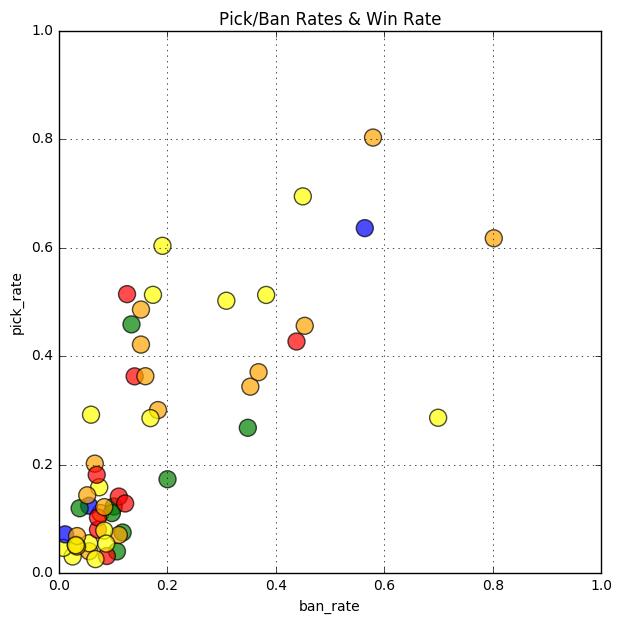

In [51]:
champ_pb[champ_pb.wins>10].plot(kind='scatter',x='ban_rate',y='pick_rate', c=c, alpha=.7, figsize=(7,7),ylim=(0,1), grid = True, s = 150,title='Pick/Ban Rates & Win Rate',xlim=(0,1))

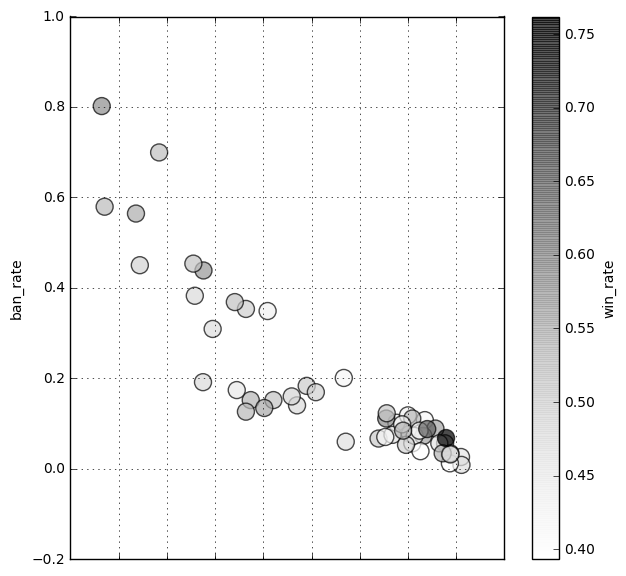

In [116]:
champ_pb[champ_pb.wins>10].plot(kind='scatter',x='no_pick',y='ban_rate', c=c, alpha=.7, figsize=(7,7), grid = True, s = 150)

In [53]:
#view into what champions a specific team banned
def team_bans(team):
    team_ban = {'ban_1':[],'ban_2':[]}
    team = team
    for i in list(pos_df[pos_df.team == team]['ban_1']):
        for champ in i:
            team_ban['ban_1'].append(champ)

    for i in list(pos_df[pos_df.team == team]['ban_2']):
        for champ in i:
            team_ban['ban_2'].append(champ)
    
    
    champ_list = list(set(team_ban['ban_1'] + team_ban['ban_2']))
    champ_win = []

    for champ in champ_list:
        for index,row in champ_pb[champ_pb.champs==champ].iterrows():
            l = [champ,row['win_rate']]
            champ_win.append(l)
    
    color = []
    for champ in champ_win:
        j=0
        if (champ[1] <= win_stdev[0]):
            color.append(j)
        else:
            for i in win_stdev:
                try:
                    if (champ[1] > i) and (champ[1] <= (win_stdev[win_stdev.index(i)+1])):
                        color.append(j+1)
                        j=j+1

                    else:
                        j=j+1
                except:
                    color.append(j)
    c = ['blue','blue','blue','blue','green','green','yellow','orange','red','red','red','red']
    colors = []
    for i in color:
        colors.append(c[i])
    
    champ_dict = {'champ':[],'win_rate':[],'color':colors}
    for i in champ_win:
        champ_dict['champ'].append(i[0])
        champ_dict['win_rate'].append(i[1])
    
    #return champ_dict
    champ_win = pd.DataFrame(champ_dict)
    
    team_ban_1 = pd.Series(team_ban['ban_1']).value_counts().reset_index()
    team_ban_1.rename(columns = {'index':'champ',0:'ban_count'},inplace=True)
    team_ban_1 = pd.merge(team_ban_1,champ_win)
    team_ban_2 = pd.Series(team_ban['ban_2']).value_counts().reset_index()
    team_ban_2.rename(columns = {'index':'champ',0:'ban_count'},inplace=True)
    team_ban_2 = pd.merge(team_ban_2,champ_win)
    
    return team_ban_1,team_ban_2,champ_win

In [54]:
team_ban_1,team_ban_2,temp=team_bans('TSM')

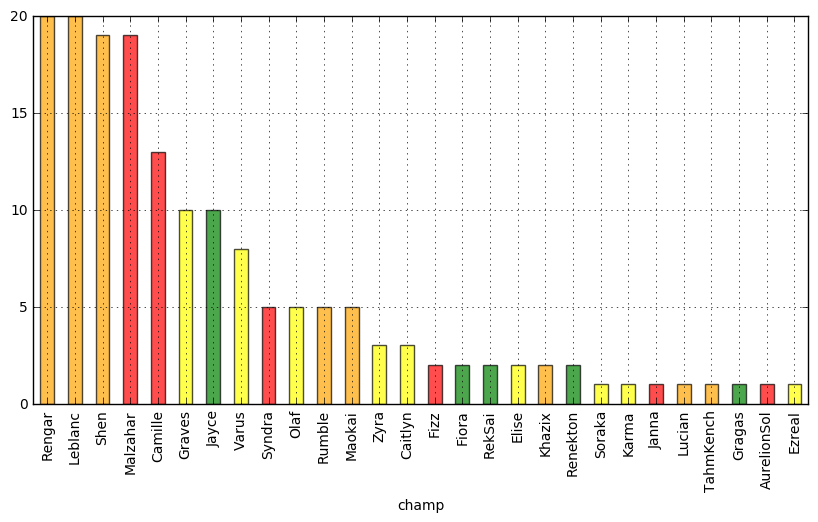

In [55]:
team_ban_1[['champ','ban_count']].plot(x='champ',y='ban_count',kind='bar', color = team_ban_1['color'], alpha = .7, grid=True, figsize=(10,5),legend=False)

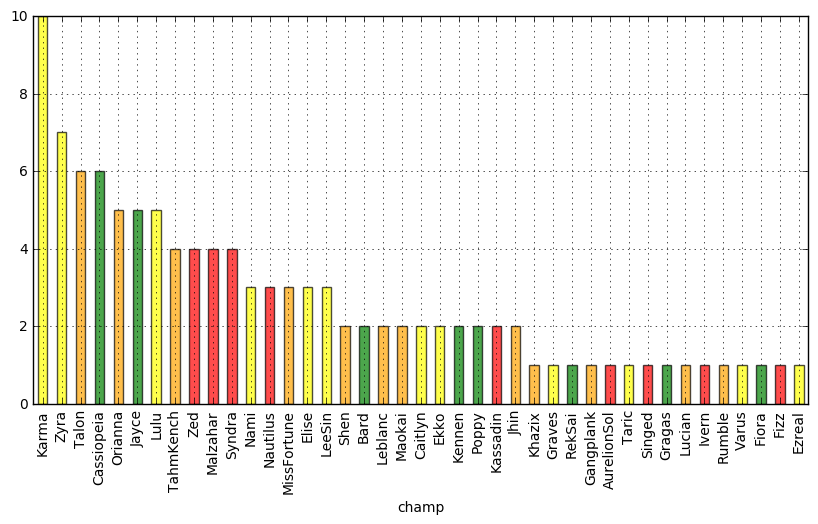

In [56]:
team_ban_2[['champ','ban_count']].plot(x='champ',y='ban_count',kind='bar', color = team_ban_2['color'], alpha = .7, grid=True, figsize=(10,5),legend=False)

In [57]:
pos_df[pos_df.league == 'North_America']

,ADC,Jungle,Middle,Support,Top,ban_1,ban_2,game_id,league,opp_ban_1,opp_ban_2,side,team,win
0,Kalista,RekSai,Syndra,Zyra,Maokai,"[Rengar, Olaf, Janna]","[Nautilus, Poppy]",610,North_America,"[Leblanc, Camille, LeeSin]","[Varus, Jhin]",blue,TSM,0
1,Ashe,Khazix,Fizz,MissFortune,Shen,"[Leblanc, Camille, LeeSin]","[Varus, Jhin]",610,North_America,"[Rengar, Olaf, Janna]","[Nautilus, Poppy]",red,C9,1
2,Varus,LeeSin,Syndra,Taric,Nautilus,"[Zyra, Maokai, Ryze]","[Fiora, Jayce]",611,North_America,"[Leblanc, Camille, Rengar]","[Karma, Lulu]",blue,C9,1
3,Ashe,RekSai,Katarina,Malzahar,Trundle,"[Leblanc, Camille, Rengar]","[Karma, Lulu]",611,North_America,"[Zyra, Maokai, Ryze]","[Fiora, Jayce]",red,TSM,0
4,Jhin,RekSai,Leblanc,TahmKench,Nautilus,"[Zyra, Syndra, Ryze]","[Orianna, Karma]",612,North_America,"[Camille, Malzahar, Ashe]","[Kennen, Thresh]",blue,FOX,0
5,Varus,Rengar,Lissandra,Nami,Maokai,"[Camille, Malzahar, Ashe]","[Kennen, Thresh]",612,North_America,"[Zyra, Syndra, Ryze]","[Orianna, Karma]",red,P1,1
6,Varus,Khazix,Orianna,Karma,Maokai,"[Ryze, Kennen, Malzahar]","[Zyra, Rumble]",613,North_America,"[Camille, Leblanc, Rengar]","[Syndra, Cassiopeia]",blue,P1,1
7,Ashe,RekSai,Anivia,Thresh,Singed,"[Camille, Leblanc, Rengar]","[Syndra, Cassiopeia]",613,North_America,"[Ryze, Kennen, Malzahar]","[Zyra, Rumble]",red,FOX,0
8,Varus,LeeSin,Corki,Malzahar,Nautilus,"[Kalista, Olaf, Zyra]","[MissFortune, Ekko]",614,North_America,"[Camille, Leblanc, Rengar]","[Fiora, Jayce]",blue,CLG,0
9,Ashe,Khazix,Cassiopeia,Lulu,Maokai,"[Camille, Leblanc, Rengar]","[Fiora, Jayce]",614,North_America,"[Kalista, Olaf, Zyra]","[MissFortune, Ekko]",red,TL,1


In [58]:
#win rates by league
def league_win_rates(league):
    league = league
    league_df = match_champs[match_champs.League == league]
    pos_df1 = pos_df[pos_df.league == league]
    
    champ_usage1 = dict((el,[]) for el in champ_list)
    champ_win1 = dict((el,[]) for el in champ_list)
    
    for index,row in pos_df1.iterrows():
        if row['win'] == 1:
            team_comp = [row['Top'],row['Jungle'],row['Middle'],row['ADC'],row['Support']]
            for champ in champ_list:
                if champ in team_comp:
                    champ_win1[champ].append(1)
                else:
                    champ_win1[champ].append(0)
        else:
            pass
    
    champ_win_df1 = pd.DataFrame(champ_win1)
    
    picked = []
    for index,row in league_df.iterrows():
        picked_champs = []
        for i in ['blue','red']:
            for j in ['Top','Jungle','Middle','ADC','Support']:
                picked_champs.append(row[i+j+'Champ'])
        picked.append(picked_champs)

    banned = []
    for index,row in league_df.iterrows():
        banned_champs = eval(row['blueBans']) + eval(row['redBans'])
        banned.append(banned_champs)
    league_df['picked'] = picked
    league_df['banned'] = banned

    for index,row in league_df.iterrows():
        ban_phase1=row.banned[:3]+row.banned[5:8]
        ban_phase2=row.banned[3:5]+row.banned[8:]
        #print ban_phase1,ban_phase2
        for champ in champ_list:
            if champ in row.picked:
                champ_usage1[champ].append(1)
            elif champ in ban_phase1:
                champ_usage1[champ].append(-1)
            elif champ in ban_phase2:
                champ_usage1[champ].append(-2)
            else:
                champ_usage1[champ].append(0)

    champ_usage_df1 = pd.DataFrame(champ_usage1)

    champ_dict1 = dict({'champs':champ_list,'usage_dict':[]})
    for i in champ_list:
        champ_dict1['usage_dict'].append(dict(champ_usage_df1[i].value_counts()))

    champ_dict2 = dict({'champs':champ_list,'usage_dict':[]})
    for i in champ_list:
        champ_dict2['usage_dict'].append(dict(champ_win_df1[i].value_counts()))

    win_col1 = []
    for i in champ_dict2['usage_dict']:
        try:
            win_col1.append(i[1])
        except:
            win_col1.append(0)
            
    
            
    #champ_pb = pd.DataFrame(champ_dict)
    
    

    pick1 = []
    no_pick1 = []
    ban1 = []
    ban2 = []
    
    champ_pb1 = pd.DataFrame(champ_dict1)
    #for index,row in champ_pb.iterrows():
    for key,value in champ_pb1.usage_dict.iteritems():
        #print key,value
        try:
            pick1.append(value[1])
        except:
            #print key,value
            pick1.append(0)
        try:
            no_pick1.append(value[0])
        except:
            #print key,value
            no_pick1.append(0)
        try:
            ban1.append(value[-1])
        except:
            ban1.append(0)
        try:
            ban2.append(value[-2])
        except:
            ban2.append(0)
    
    
    champ_pb1['pick'] = pick1
    champ_pb1['ban_1'] = ban1
    champ_pb1['ban_2'] = ban2
    champ_pb1['no_pick'] = no_pick1
    champ_pb1['wins'] = win_col1

    pick_rate1 = []
    win_rate1 = []
    ban_rate1 = []
    ban_rate2 = []


    for index,row in champ_pb1.iterrows():
        if row['pick'] > 0:
            win_rate1.append((float(row['wins'])/row['pick']))
            pick_rate1.append((float(row['pick'])/(row['pick']+row['no_pick'])))
            ban_rate1.append((float(row['ban_1'])/(row['pick']+row['no_pick']+row['ban_1'])))
            ban_rate2.append((float(row['ban_2'])/(row['pick']+row['no_pick']+row['ban_2'])))
        else:
            win_rate1.append(0)
            pick_rate1.append((float(row['pick'])/(row['pick']+row['no_pick'])))
            ban_rate1.append((float(row['ban_1'])/(row['pick']+row['no_pick']+row['ban_1'])))
            ban_rate2.append((float(row['ban_2'])/(row['pick']+row['no_pick']+row['ban_2'])))

    champ_pb1['win_rate'] = win_rate1
    champ_pb1['pick_rate'] = pick_rate1
    champ_pb1['ban_rate1'] = ban_rate1
    champ_pb1['ban_rate2'] = ban_rate2
    
    return champ_pb1

In [59]:
#ban rates by league
def league_bans(league):
    league_ban = {'ban_1':[],'ban_2':[]}
    league = league
    region_win_rates = league_win_rates(league)
    for i in list(pos_df[pos_df.league == league]['ban_1']):
        for champ in i:
            league_ban['ban_1'].append(champ)

    for i in list(pos_df[pos_df.league == league]['ban_2']):
        for champ in i:
            league_ban['ban_2'].append(champ)
    
    
    champ_list = list(set(league_ban['ban_1'] + league_ban['ban_2']))
    champ_win = []

    for champ in champ_list:
        for index,row in region_win_rates[region_win_rates.champs == champ].iterrows():
            l = [champ,row['win_rate'],row['ban_rate1'],row['ban_rate2']]
            champ_win.append(l)
    
    color = []
    for champ in champ_win:
        j=0
        if (champ[1] <= win_stdev[0]):
            color.append(j)
        else:
            for i in win_stdev:
                try:
                    if (champ[1] > i) and (champ[1] <= (win_stdev[win_stdev.index(i)+1])):
                        color.append(j+1)
                        j=j+1

                    else:
                        j=j+1
                except:
                    color.append(j)
    c = ['blue','blue','blue','blue','green','green','yellow','orange','red','red','red','red']
    colors = []
    for i in color:
        colors.append(c[i])
    
    champ_dict1 = {'champ':[],'win_rate':[],'color':colors,'ban_rate1':[],'ban_rate2':[]}
    for i in champ_win:
        champ_dict1['champ'].append(i[0])
        champ_dict1['win_rate'].append(i[1])
        champ_dict1['ban_rate1'].append(i[2])
        champ_dict1['ban_rate2'].append(i[3])
        
    champ_win = pd.DataFrame(champ_dict1)
    
    ban_1_df = pd.Series(league_ban['ban_1']).value_counts().reset_index()
    ban_1_df.rename(columns = {'index':'champ',0:'ban_count'},inplace=True)
    ban_1_df = pd.merge(ban_1_df,champ_win)
    ban_2_df = pd.Series(league_ban['ban_2']).value_counts().reset_index()
    ban_2_df.rename(columns = {'index':'champ',0:'ban_count'},inplace=True)
    ban_2_df = pd.merge(ban_2_df,champ_win)
    
    return ban_1_df,ban_2_df,champ_win,region_win_rates

In [60]:
#region_win_rates[region_win_rates.champs == 'Syndra']

In [61]:
#pd.merge(ban_1_df,champ_win)

In [62]:
#champ_usage_df1,champ_pb1 = league_win_rates('LCK')

In [63]:
#champ_pb1.sort_values(by='ban_rate1',ascending=False)

In [64]:
#champ_usage_df1['Zyra'].value_counts()

In [65]:
#league_df[(league_df.redTopChamp == 'Camille') | (league_df.blueTopChamp == 'Camille')]

In [66]:
#win_rates1[win_rates1.champs == 'Zyra']

In [67]:
#ban_1_df

In [68]:
league = 'LCK'
ban_1_df,ban_2_df,champ_win,league_win=league_bans(league)

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
pos_df.league.value_counts()

LCK              510
North_America    490
Europe           358
LMS              224
CBLOL            134
Name: league, dtype: int64

In [70]:
#colors = []
#region_win_rates = league_win_rates(league)
#for index,row in region_win_rates[region_win_rates.pick > 74].iterrows():
#for index,row in champ_pb.iterrows():
#    j=0
#    for i in win_stdev:
#        try:
#            if (row['win_rate'] > i) and (row['win_rate'] < win_stdev[j+1]):
#                colors.append(j+1)
#                j=j+1
#            else:
#                j=j+1
#        except:
#            print i,j,row['win_rate']
#            if (row['win_rate'] > i):
#                colors.append(j+1)
#                j=j+1
#            else:
#                j=j+1
#                
#c2 = ['blue','blue','blue','blue','blue','green','yellow','orange','red','red','red','red']
#c = []
#for i in colors:
#    c.append(c2[i])

In [71]:
league = 'LCK'
ban_1_df,ban_2_df,champ_win,league_win=league_bans(league)

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


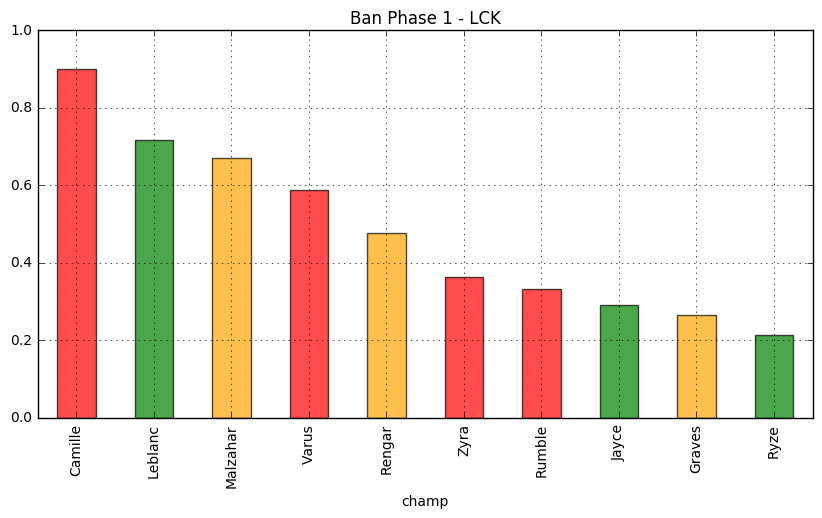

In [72]:
ban_1_df[['champ','ban_rate1']].sort_values(by='ban_rate1',ascending=False).head(10).plot(x='champ',y='ban_rate1',ylim=(0,1),kind='bar', color = ban_1_df['color'], alpha = .7, grid=True, figsize=(10,5),title='Ban Phase 1 - '+league,legend=False)

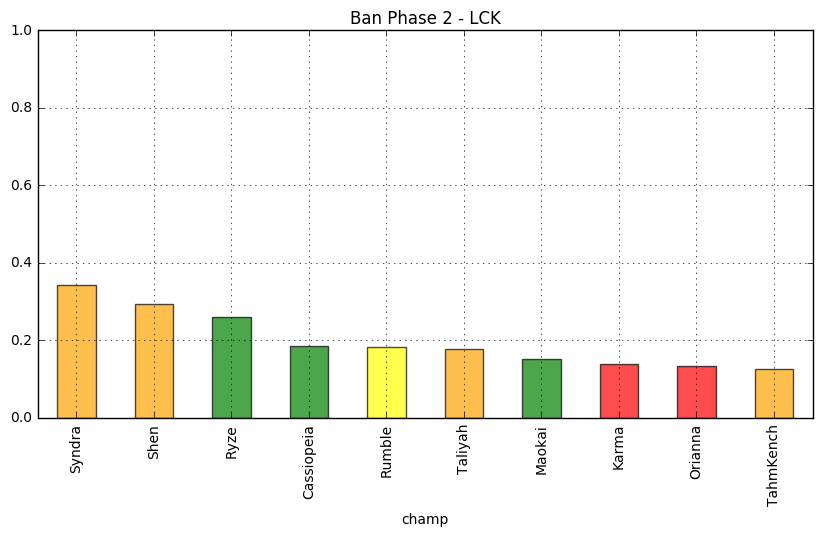

In [73]:
ban_2_df[['champ','ban_rate2']].head(10).sort_values(by='ban_rate2',ascending=False).plot(x='champ',ylim=(0,1),y='ban_rate2',kind='bar', color = ban_2_df['color'], alpha = .7, grid=True, figsize=(10,5),title='Ban Phase 2 - '+league,legend=False)

In [74]:
#opponent team tended to ban against a specific team
def opp_team_ban(team):
    team_ban = {'ban_1':[],'ban_2':[]}
    team = team
    for i in list(pos_df[pos_df.team == team]['opp_ban_1']):
        for champ in i:
            team_ban['ban_1'].append(champ)

    for i in list(pos_df[pos_df.team == team]['opp_ban_2']):
        for champ in i:
            team_ban['ban_2'].append(champ)
    
    
    champ_list = list(set(team_ban['ban_1'] + team_ban['ban_2']))
    champ_win = []

    for champ in champ_list:
        for index,row in champ_pb[champ_pb.champs==champ].iterrows():
            l = [champ,row['win_rate']]
            champ_win.append(l)
    
    color = []
    for champ in champ_win:
        j=0
        if (champ[1] < win_stdev[0]):
            color.append(j)
        else:
            for i in win_stdev:
                try:
                    if (champ[1] > i) and (champ[1] < (win_stdev[win_stdev.index(i)+1])):
                        color.append(j+1)
                        j=j+1

                    else:
                        j=j+1
                except:
                    color.append(j)
    c = ['blue','blue','blue','blue','green','green','yellow','orange','red','red','red','red']
    colors = []
    for i in color:
        colors.append(c[i])
    
    champ_dict = {'champ':[],'win_rate':[],'color':colors}
    for i in champ_win:
        champ_dict['champ'].append(i[0])
        champ_dict['win_rate'].append(i[1])
        
    champ_win = pd.DataFrame(champ_dict)
    
    team_ban_1 = pd.Series(team_ban['ban_1']).value_counts().reset_index()
    team_ban_1.rename(columns = {'index':'champ',0:'ban_count'},inplace=True)
    team_ban_1 = pd.merge(team_ban_1,champ_win)
    team_ban_2 = pd.Series(team_ban['ban_2']).value_counts().reset_index()
    team_ban_2.rename(columns = {'index':'champ',0:'ban_count'},inplace=True)
    team_ban_2 = pd.merge(team_ban_2,champ_win)
    
    return team_ban_1,team_ban_2,champ_win

In [76]:
#opp_team_ban_1,opp_team_ban_2,temp1 = opp_team_ban('TSM')

In [ ]:
#opp_team_ban_1.head(10)[['champ','ban_count']].plot(x='champ',y='ban_count',kind='bar', color = opp_team_ban_1['color'], alpha = .7, grid=True, figsize=(10,5),legend=False)

In [ ]:
#opp_team_ban_2.head(10)[['champ','ban_count']].plot(x='champ',y='ban_count',kind='bar', color = opp_team_ban_2['color'], alpha = .7, grid=True, figsize=(10,5),legend=False)

In [77]:
NA = match_champs[match_champs.League=='North_America']


In [79]:
#Champion pick/ban trends across the season
#creating 'frames' or grouping of games in chrono order -- no dates with records
frame = []
for i in range(10):
    for j in range(len(NA)//10):
        frame.append(i)
for k in range(len(NA)%10):
    frame.append(i)

In [80]:
pd.Series(frame).value_counts()

9    29
8    24
7    24
6    24
5    24
4    24
3    24
2    24
1    24
0    24
dtype: int64

In [81]:
NA['frame'] = frame

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [82]:
def NA_pos_df(NA):
    NA = NA
    pos_champ = {'game_id':[],'side':[],'Top':[],'Jungle':[],'Middle':[],'ADC':[],'Support':[],
                 'ban_1':[],'ban_2':[],'opp_ban_1':[],'opp_ban_2':[],'team':[],'win':[],'league':[],'frame':[]}

    for index,row in NA.iterrows():
        side = ['blue','red']
        for i in side:
            pos_champ['game_id'].append(int(row['index']))
            pos_champ['side'].append(i)
            pos_champ['ban_1'].append(eval(row[i+'Bans'])[:3])
            pos_champ['ban_2'].append(eval(row[i+'Bans'])[3:])
            pos_champ['opp_ban_1'].append(eval(row[side[side.index(i)-1]+'Bans'])[:3])
            pos_champ['opp_ban_2'].append(eval(row[side[side.index(i)-1]+'Bans'])[3:])
            pos_champ['win'].append(row[i[0]+'Result'])
            pos_champ['team'].append(row[i+'TeamTag'])
            for j in ['Top','Jungle','Middle','ADC','Support']:
                pos_champ[j].append(row[i+j+'Champ'])
            pos_champ['league'].append(row['League'])
            pos_champ['frame'].append(row['frame'])
            
    pos_champ_df = pd.DataFrame(pos_champ)
    return pos_champ_df

In [83]:
NA = NA_pos_df(NA)

In [84]:
NA

,ADC,Jungle,Middle,Support,Top,ban_1,ban_2,frame,game_id,league,opp_ban_1,opp_ban_2,side,team,win
0,Kalista,RekSai,Syndra,Zyra,Maokai,"[Rengar, Olaf, Janna]","[Nautilus, Poppy]",0,610,North_America,"[Leblanc, Camille, LeeSin]","[Varus, Jhin]",blue,TSM,0
1,Ashe,Khazix,Fizz,MissFortune,Shen,"[Leblanc, Camille, LeeSin]","[Varus, Jhin]",0,610,North_America,"[Rengar, Olaf, Janna]","[Nautilus, Poppy]",red,C9,1
2,Varus,LeeSin,Syndra,Taric,Nautilus,"[Zyra, Maokai, Ryze]","[Fiora, Jayce]",0,611,North_America,"[Leblanc, Camille, Rengar]","[Karma, Lulu]",blue,C9,1
3,Ashe,RekSai,Katarina,Malzahar,Trundle,"[Leblanc, Camille, Rengar]","[Karma, Lulu]",0,611,North_America,"[Zyra, Maokai, Ryze]","[Fiora, Jayce]",red,TSM,0
4,Jhin,RekSai,Leblanc,TahmKench,Nautilus,"[Zyra, Syndra, Ryze]","[Orianna, Karma]",0,612,North_America,"[Camille, Malzahar, Ashe]","[Kennen, Thresh]",blue,FOX,0
5,Varus,Rengar,Lissandra,Nami,Maokai,"[Camille, Malzahar, Ashe]","[Kennen, Thresh]",0,612,North_America,"[Zyra, Syndra, Ryze]","[Orianna, Karma]",red,P1,1
6,Varus,Khazix,Orianna,Karma,Maokai,"[Ryze, Kennen, Malzahar]","[Zyra, Rumble]",0,613,North_America,"[Camille, Leblanc, Rengar]","[Syndra, Cassiopeia]",blue,P1,1
7,Ashe,RekSai,Anivia,Thresh,Singed,"[Camille, Leblanc, Rengar]","[Syndra, Cassiopeia]",0,613,North_America,"[Ryze, Kennen, Malzahar]","[Zyra, Rumble]",red,FOX,0
8,Varus,LeeSin,Corki,Malzahar,Nautilus,"[Kalista, Olaf, Zyra]","[MissFortune, Ekko]",0,614,North_America,"[Camille, Leblanc, Rengar]","[Fiora, Jayce]",blue,CLG,0
9,Ashe,Khazix,Cassiopeia,Lulu,Maokai,"[Camille, Leblanc, Rengar]","[Fiora, Jayce]",0,614,North_America,"[Kalista, Olaf, Zyra]","[MissFortune, Ekko]",red,TL,1


In [85]:
champ_trend_1 = dict((el,[]) for el in champ_list)
champ_trend_2 = dict((el,[]) for el in champ_list)


In [86]:
for index,row in NA.iterrows():
    for champ in champ_list:
        if champ in row.ban_1:
            champ_trend_1[champ].append(1)
        else:
            champ_trend_1[champ].append(0)
            
for index,row in NA.iterrows():
    for champ in champ_list:
        if champ in row.ban_2:
            champ_trend_2[champ].append(1)
        else:
            champ_trend_2[champ].append(0)

In [87]:
trend_ban_1 = pd.DataFrame(champ_trend_1)
trend_ban_1['frame'] = NA['frame']
trend_ban_2 = pd.DataFrame(champ_trend_2)
trend_ban_2['frame'] = NA['frame']

In [88]:
cols_1 = list(trend_ban_1.mean().sort_values(ascending=False).head(11).reset_index()['index'][:6])
cols_2 = list(trend_ban_2.mean().sort_values(ascending=False).head(11).reset_index()['index'])

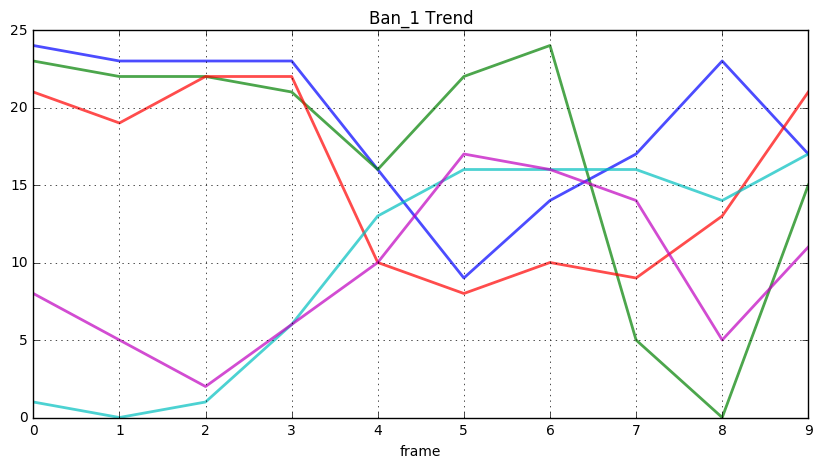

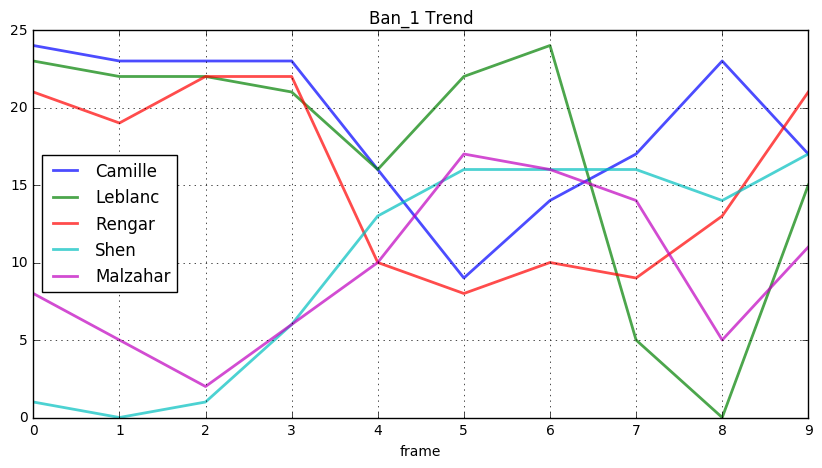

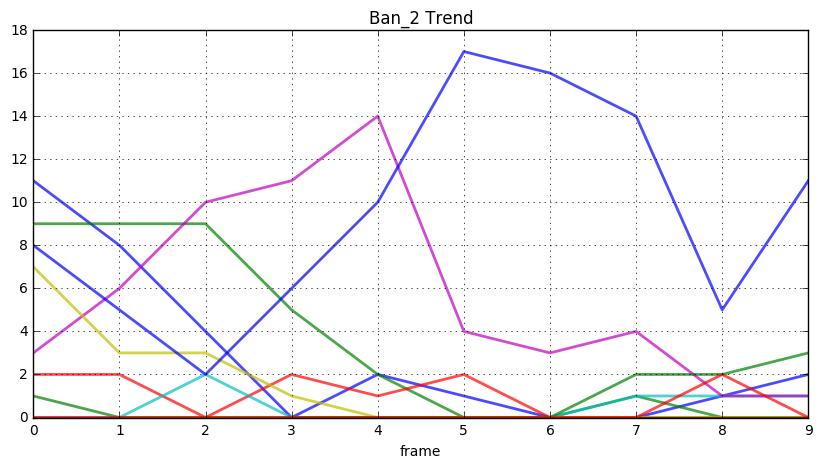

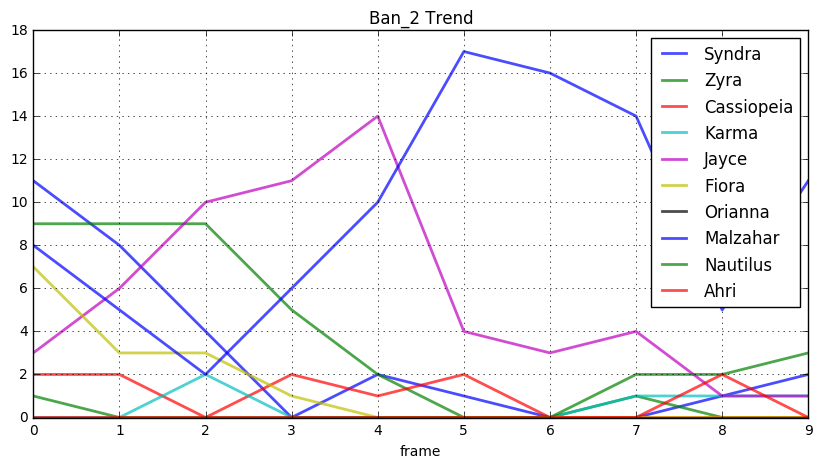

In [89]:
trend_ban_1[cols_1].groupby(['frame']).sum().plot(grid=True,figsize=(10,5),title="Ban_1 Trend",lw=2,alpha=.7,legend=False)
trend_ban_1[cols_1].groupby(['frame']).sum().plot(grid=True,figsize=(10,5),title="Ban_1 Trend",lw=2,alpha=.7)
trend_ban_1[cols_2].groupby(['frame']).sum().plot(grid=True,figsize=(10,5),title="Ban_2 Trend",lw=2,alpha=.7,legend=False)
trend_ban_1[cols_2].groupby(['frame']).sum().plot(grid=True,figsize=(10,5),title="Ban_2 Trend",lw=2,alpha=.7)

In [90]:
pick_trend = dict((el,[]) for el in champ_list)

for index,row in match_champs.iterrows():
    for champ in champ_list:
        if champ in row.picked:
            pick_trend[champ].append(1)
        elif champ in row.banned:
            pick_trend[champ].append(-1)
        else:
            pick_trend[champ].append(0)
pick_trend = pd.DataFrame(pick_trend)

In [91]:
pick_trend['MatchHistory'] = match_champs['MatchHistory']
pick_trend['League'] = match_champs['League']
pick_trend['Season'] = match_champs['Season']
pick_trend['blueTeamTag'] = match_champs['blueTeamTag']
pick_trend['redTeamTag'] = match_champs['redTeamTag']

In [92]:
pick_trend_league = pick_trend[pick_trend.League == 'North_America']

In [93]:
frame = []
for i in range(10):
    for j in range(len(pick_trend_league)//10):
        frame.append(i)
for k in range(len(pick_trend_league)%10):
    frame.append(i)

In [94]:
pick_trend_league['frame'] = frame

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
cols = list(pick_trend_league.mean().sort_values(ascending=False).head(6).reset_index()['index'])

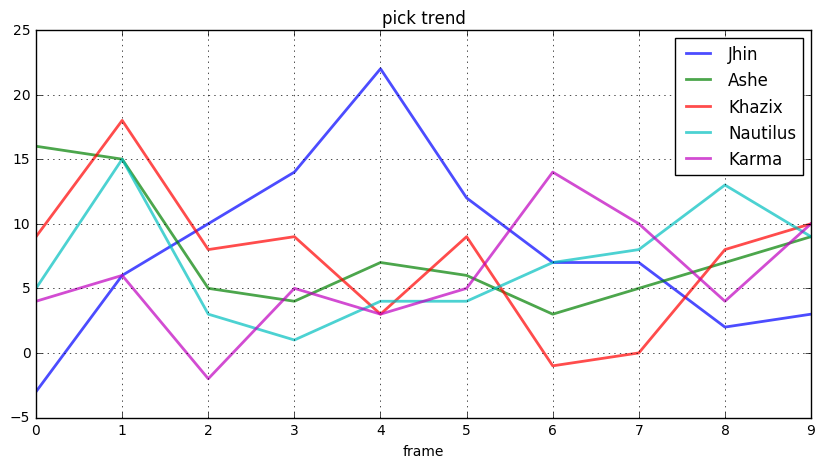

In [96]:
pick_trend_league[cols].groupby(['frame']).sum().plot(grid=True,figsize=(10,5),title='pick trend',lw=2,alpha=.7)

In [97]:
def pick_rate_trend(pick_trend_league):
    pick_trend_league = pick_trend_league
    temp_pick_trend = dict((el,[]) for el in champ_list)
    for champ in champ_list:
        temp_df = pick_trend_league.groupby('frame')[champ].value_counts().rename(columns={champ:'count'}).reset_index().rename(columns={0:'count'})
        a=0
        b=0
        c=0

        for i in range(max(frame)+1):
            for index,row in temp_df.iterrows():

                if row['frame'] == i:
                    if row[champ] == 0:
                        b = row['count']
                    elif row[champ] == 1:
                        a = row['count']
                    elif row[champ] == -1:
                        c = row['count']
            try:
                pick_rate = float(a)/(a+b)
            except:
                pick_rate = 0.0
            temp_pick_trend[champ].append(pick_rate)
    return pd.DataFrame(temp_pick_trend)

In [98]:
temp_pick_trend = dict((el,[]) for el in champ_list)
for champ in champ_list:
    temp_df = pick_trend_league.groupby('frame')[champ].value_counts().rename(columns={champ:'count'}).reset_index().rename(columns={0:'count'})
    a=0
    b=0
    c=0

    for i in range(max(frame)+1):
        for index,row in temp_df.iterrows():

            if row['frame'] == i:
                if row[champ] == 0:
                    b = row['count']
                elif row[champ] == 1:
                    a = row['count']
                elif row[champ] == -1:
                    c = row['count']
        try:
            pick_rate = float(a)/(a+b)
        except:
            pick_rate = 0.0
        temp_pick_trend[champ].append(pick_rate)


In [99]:
picks = pick_rate_trend(pick_trend_league)

In [100]:
role = 'Support'
role_cols = list(champ_pb[['champs',role]].sort_values(by=role,ascending=False).head(5).champs)

In [101]:
cols = list(picks.mean().sort_values(ascending=False)[0:5].reset_index()['index'])

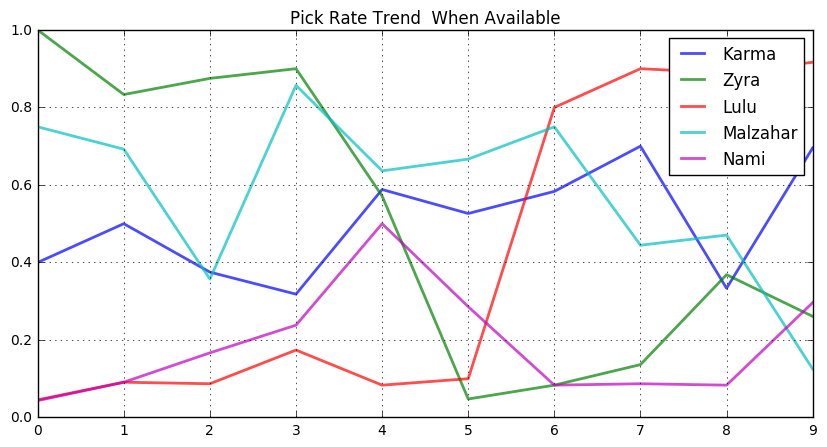

In [102]:
picks[role_cols].plot(grid=True,figsize=(10,5),title='Pick Rate Trend  When Available',lw=2,alpha=.7)

In [103]:
#ban counts by role
dominant_role = []
for index,row in champ_pb[['champs','role_list','Top','Jungle','Middle','ADC','Support']].iterrows():
    if len(row['role_list']) == 1:
        dominant_role.append(row['role_list'][0])
    else:
        role_counts = [row['Top'],row['Jungle'],row['Middle'],row['ADC'],row['Support']]
        max1 = max(role_counts)

        dominant_role.append(['Top','Jungle','Middle','ADC','Support'][role_counts.index(max1)])
        
        

,ban
champ_role,
ADC,888
Jungle,1316
Middle,2608
Support,1450
Top,2278


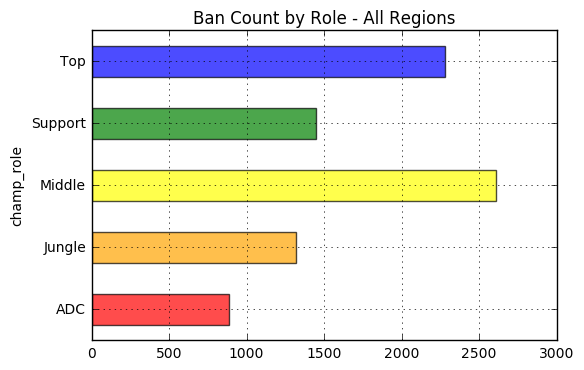

In [104]:
#colormap = ['red','orange','yellow','green','blue']
champ_pb['champ_role'] = dominant_role
champ_pb[['champs','ban','champ_role']].groupby('champ_role').sum().plot(kind='barh',legend=False,color=['red','orange','yellow','green','blue'],alpha=.7,grid=True,title='Ban Count by Role - All Regions')
champ_pb[['champs','ban','champ_role']].groupby('champ_role').sum()#.plot(kind='pie',y='ban',legend=False,title='Ban Count by Role - All Regions',figsize=(5,5))


In [105]:
region_win_rates = league_win_rates('North_America')

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [106]:
#make graph about pick and ban by role segmented by ban phase
role_bp_1 = dict((el,[]) for el in champ_list)
role_bp_2 = dict((el,[]) for el in champ_list)

league1 = 'LCK'
NA = match_champs[match_champs.League==league1]
frame = []
for i in range(10):
    for j in range(len(NA)//10):
        frame.append(i)
for k in range(len(NA)%10):
    frame.append(i)
NA['frame'] = frame
NA = NA_pos_df(NA)


for index,row in NA.iterrows():
    for champ in champ_list:
        if champ in row.ban_1:
            role_bp_1[champ].append(1)
        else:
            role_bp_1[champ].append(0)
            
for index,row in NA.iterrows():
    for champ in champ_list:
        if champ in row.ban_2:
            role_bp_2[champ].append(1)
        else:
            role_bp_2[champ].append(0)

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [107]:
role_bp_1  = pd.DataFrame(role_bp_1)
role_bp_2  = pd.DataFrame(role_bp_2)

In [108]:
role_bp1 = role_bp_1.sum().reset_index().rename(columns = {'index':'champs',0:'count'})
champ_role = []
for index,row in role_bp1.iterrows():
    #print row['champs']
    role = champ_pb[champ_pb.champs == row['champs']]['champ_role'].iloc[0]
    #print role
    champ_role.append(role)

champ_role2 = []    
role_bp2 = role_bp_2.sum().reset_index().rename(columns = {'index':'champs',0:'count'})
for index,row in role_bp2.iterrows():
    #print row['champs']
    role = champ_pb[champ_pb.champs == row['champs']]['champ_role'].iloc[0]
    #print role
    champ_role2.append(role)

In [109]:
role_bp1['champ_role'] = champ_role
role_bp2['champ_role'] = champ_role2

In [110]:
role_bp1[['champs','count','champ_role']].groupby('champ_role').sum()#.plot(kind='bar',legend=False,color=['red','orange','yellow','green','blue'],alpha=.7,grid=True,title='Ban Phase 1 Count by Role - '+league1)

,count
champ_role,
ADC,223
Jungle,250
Middle,368
Support,285
Top,404


In [111]:
role_bp2[['champs','count','champ_role']].groupby('champ_role').sum()#.plot(kind='bar',legend=False,color=['red','orange','yellow','green','blue'],alpha=.7,grid=True,title='Ban Phase 2 Count by Role - '+league1)

,count
champ_role,
ADC,63
Jungle,71
Middle,435
Support,188
Top,258


In [112]:
#bans by role analysis
def role_ban(pos_df):
    pos_df = pos_df
    ban_1_role = []
    ban_2_role = []
    champ_ban_1 = []
    champ_ban_2 = []
    for index,row in pos_df.iterrows():
        ban_1 = []
        ban_2 = []
        
        for champ in row['ban_1']:
            #print champ
            try:
                ban_1.append(champ_pb[champ_pb.champs==champ]['champ_role'].iloc[0])
            except:
                pass
        for champ in row['ban_2']:
            #print champ
            try:
                ban_2.append(champ_pb[champ_pb.champs==champ]['champ_role'].iloc[0])
            except:
                pass
        
         
        ban_1_role.append(', '.join(sorted(ban_1)))
        ban_2_role.append(', '.join(sorted(ban_2)))
        champ_ban_1.append(', '.join(sorted(row['ban_1'])))
        champ_ban_2.append(', '.join(sorted(row['ban_2'])))
    return ban_1_role,ban_2_role,champ_ban_1,champ_ban_2

In [117]:
#champ_ban_1

In [118]:
#ban_league = 'North_America'
side = 'Red'
#ban_1_role,ban_2_role,champ_ban_1,champ_ban_2 = role_ban(pos_df[(pos_df.league==ban_league) & (pos_df.side == side)])
ban_1_role,ban_2_role,champ_ban_1,champ_ban_2 = role_ban(pos_df[(pos_df.side == side.lower())])

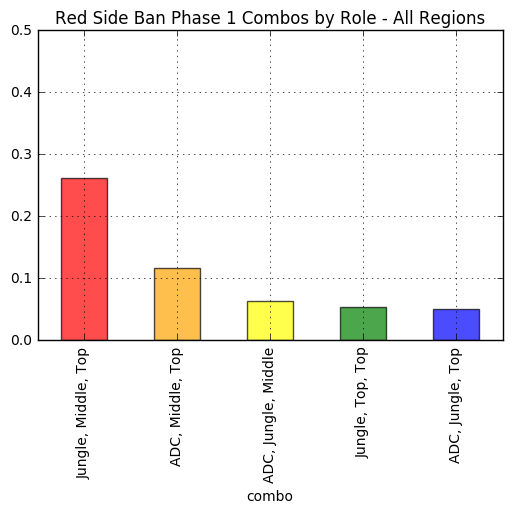

In [119]:
#pd.Series(ban_1_role).value_counts().head(5).plot(kind='bar',color=['red','orange','yellow','green','blue'],alpha = .7, grid = True, title = 'Ban Phase 1 Combos by Role - '+ban_league)
temp_ban = pd.DataFrame(ban_1_role)[0].value_counts().reset_index().rename(columns={'index':'combo',0:'count'})
temp_ban_pct = []
sum_counts = int(temp_ban['count'].sum())
for index,row in temp_ban.iterrows():
    temp_ban_pct.append(float(row['count'])/sum_counts)
temp_ban['temp_ban_pct'] = temp_ban_pct
temp_ban[['combo','temp_ban_pct']].head(5).plot(kind='bar',x='combo',ylim=(0,.5),color=['red','orange','yellow','green','blue'],alpha = .7, grid = True, legend = False, title = side+' Side Ban Phase 1 Combos by Role - All Regions')

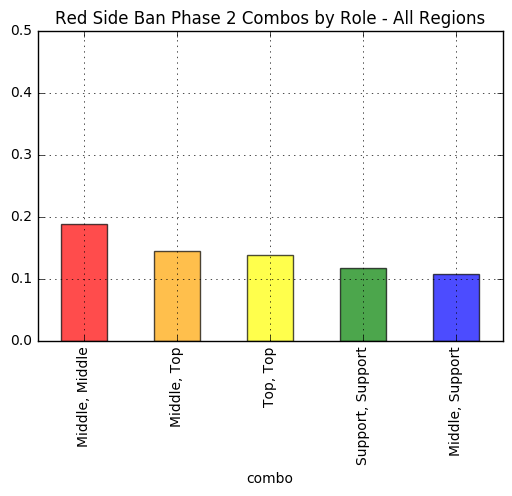

In [120]:
#pd.Series(ban_2_role).value_counts().head(5).plot(kind='bar',color=['red','orange','yellow','green','blue'],alpha = .7, grid = True, title = 'Ban Phase 2 Combos by Role - '+ban_league)
temp_ban = pd.DataFrame(ban_2_role)[0].value_counts().reset_index().rename(columns={'index':'combo',0:'count'})
temp_ban_pct = []
sum_counts = int(temp_ban['count'].sum())
for index,row in temp_ban.iterrows():
    temp_ban_pct.append(float(row['count'])/sum_counts)
temp_ban['temp_ban_pct'] = temp_ban_pct
temp_ban[['combo','temp_ban_pct']].head(5).plot(kind='bar',x='combo',ylim=(0,.5),color=['red','orange','yellow','green','blue'],alpha = .7, grid = True, legend=False,title = side+' Side Ban Phase 2 Combos by Role - All Regions')

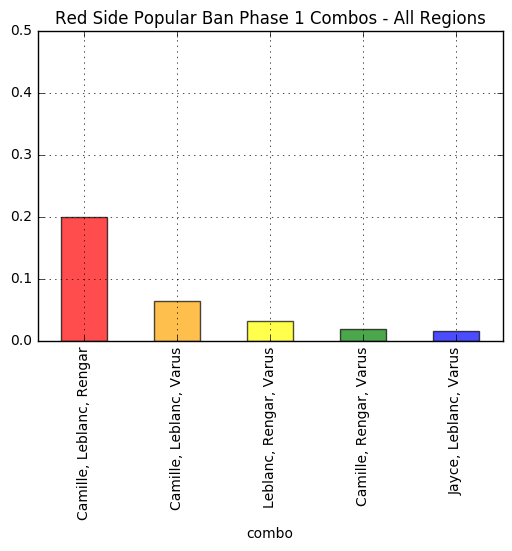

In [121]:
#pd.Series(champ_ban_1).value_counts().head(5).plot(kind='bar',color=['red','orange','yellow','green','blue'],alpha = .7, grid = True, title = 'Popular Ban Phase 1 Combos - '+ban_league)
temp_ban = pd.DataFrame(champ_ban_1)[0].value_counts().reset_index().rename(columns={'index':'combo',0:'count'})
temp_ban_pct = []
sum_counts = int(temp_ban['count'].sum())
for index,row in temp_ban.iterrows():
    temp_ban_pct.append(float(row['count'])/sum_counts)
temp_ban['temp_ban_pct'] = temp_ban_pct
temp_ban[['combo','temp_ban_pct']].head(5).plot(kind='bar',x='combo',ylim=(0,.5),color=['red','orange','yellow','green','blue'],alpha = .7, grid = True, legend=False, title = side+' Side Popular Ban Phase 1 Combos - All Regions')

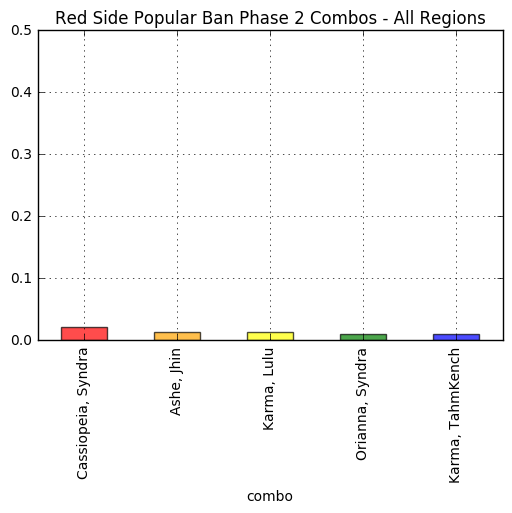

In [122]:
#pd.Series(champ_ban_2).value_counts().head(5).plot(kind='bar',color=['red','orange','yellow','green','blue'],alpha = .7, grid = True, title = 'Popular Ban Phase 2 Combos  - '+ban_league)
temp_ban = pd.DataFrame(champ_ban_2)[0].value_counts().reset_index().rename(columns={'index':'combo',0:'count'})
temp_ban_pct = []
sum_counts = int(temp_ban['count'].sum())
for index,row in temp_ban.iterrows():
    temp_ban_pct.append(float(row['count'])/sum_counts)
temp_ban['temp_ban_pct'] = temp_ban_pct
temp_ban[['combo','temp_ban_pct']].head(5).plot(kind='bar',x='combo',ylim=(0,.5),color=['red','orange','yellow','green','blue'],alpha = .7, grid = True, legend=False, title = side+' Side Popular Ban Phase 2 Combos - All Regions')

In [124]:
#bans by side analysis
pos_ban_side = {'blue':[],'red':[]}
for index,row in pos_df.iterrows():
    if row.side == 'blue':
        for champ in row.ban_1:
            pos_ban_side['blue'].append(champ)
    else:
        for champ in row.ban_1:
            pos_ban_side['red'].append(champ)
    
    

In [125]:
ban_side = pd.DataFrame(pos_ban_side).red.value_counts().reset_index().merge(pd.DataFrame(pos_ban_side).blue.value_counts().reset_index())

In [126]:
tot = []
for index,row in ban_side.iterrows():
    tot.append(row.red+row.blue)

In [127]:
ban_side['total'] = tot

In [128]:
ban_side.sort_values(by='total',ascending=False).head(10)

,index,red,blue,total
0,Camille,471,182,653
1,Leblanc,458,113,571
2,Rengar,358,125,483
6,Malzahar,92,330,422
3,Varus,262,85,347
7,Shen,90,171,261
4,Graves,137,94,231
5,Rumble,121,98,219
9,Jayce,49,162,211
10,Ryze,44,147,191


In [129]:
champ_combos = []
for index,row in pos_df.iterrows():
    champ_combos.append(', '.join(sorted(row['ban_1'])))

In [130]:
pd.DataFrame(champ_combos)[0].value_counts().reset_index().head(10)

,index,0
0,"Camille, Leblanc, Rengar",172
1,"Camille, Leblanc, Varus",55
2,"Leblanc, Rengar, Varus",27
3,"Camille, Rengar, Varus",16
4,"Jayce, Malzahar, Zyra",14
5,"Leblanc, Malzahar, Rengar",14
6,"Jayce, Leblanc, Varus",14
7,"Camille, Graves, Rumble",12
8,"Camille, Rumble, Varus",12
9,"Malzahar, Ryze, Zyra",11


In [131]:
ban_1_role,ban_2_role,champ_ban_1,champ_ban_2 = role_ban(pos_df)

In [132]:
NA_ban_1_role,ban_2_role,champ_ban_1,champ_ban_2 = role_ban(pos_df[pos_df.league=='North_America'])

In [133]:
LCK_ban_1_role,ban_2_role,champ_ban_1,champ_ban_2 = role_ban(pos_df[pos_df.league=='LCK'])

In [134]:
pd.DataFrame(LCK_ban_1_role)[0].value_counts().reset_index().head(10)

,index,0
0,"Jungle, Middle, Top",63
1,"ADC, Middle, Top",62
2,"Jungle, Middle, Support",36
3,"Middle, Support, Top",35
4,"Jungle, Support, Top",29
5,"Jungle, Top, Top",22
6,"Middle, Support, Support",20
7,"ADC, Middle, Support",20
8,"Middle, Middle, Support",17
9,"ADC, Support, Top",16


In [135]:
NA_LCK_role_combos = pd.DataFrame(NA_ban_1_role)[0].value_counts().reset_index().rename(columns = {0:'NA'}).merge(pd.DataFrame(LCK_ban_1_role)[0].value_counts().reset_index().rename(columns = {0:'LCK'}))

In [136]:
pd.DataFrame(ban_1_role)[0].value_counts().reset_index().head().merge(NA_LCK_role_combos)

,index,0,NA,LCK
0,"Jungle, Middle, Top",277,98,63
1,"ADC, Middle, Top",131,27,62
2,"Middle, Support, Top",108,30,35
3,"Jungle, Support, Top",82,24,29
4,"Jungle, Middle, Support",82,10,36
